In [1]:
import eikon as eikon

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
from functools import partial

In [3]:
 eikon.set_app_key('1153655a813e49b09943821a11d273d879402478')

In [4]:
rics = ['EDc1', 'EDc4', 'EDc7', 'EDc8', 'EDc9','EDc10','EDc11','EDc12','EDc13','EDc14', 'EDc15','EDc16']

In [69]:
#pulling all closing rates and putting into one table
table_2015_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2015-01-01', end_date = '2015-01-07' , interval = 'daily', calendar='native')
table_2015 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2015-01-08', end_date = '2015-12-31' , interval = 'daily', calendar='native')
table_2016_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2016-01-01', end_date = '2016-01-05' , interval = 'daily', calendar='native')
table_2016 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2016-01-01', end_date = '2016-12-31' , interval = 'daily', calendar='native')
table_2017_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2017-01-01', end_date = '2017-01-03' , interval = 'daily', calendar='native')
table_2017 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2017-01-01', end_date = '2017-12-31' , interval = 'daily', calendar='native')
table_2018_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2018-01-01', end_date = '2018-01-02' , interval = 'daily', calendar='native')
table_2018 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2018-01-01', end_date = '2018-12-31' , interval = 'daily', calendar='native')
table_2019 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2019-01-01', end_date = '2019-12-31' , interval = 'daily', calendar='native')

In [6]:
table = pd.concat([table_2015_1, table_2015, table_2016_1, table_2016, table_2017_1, table_2017, table_2018_1, table_2018, table_2019,], ignore_index= False)

In [7]:
table1 = table
table1.fillna(method='bfill', inplace=True)

In [8]:
table1['EDc1_1D'] = (table1['EDc1'] - table1['EDc1'].shift(1))*100
table1['EDc4_1D'] = (table1['EDc4'] - table1['EDc4'].shift(1))*100
table1['EDc7_1D'] = (table1['EDc7'] - table1['EDc7'].shift(1))*100
table1['EDc8_1D'] = (table1['EDc8'] - table1['EDc8'].shift(1))*100
table1['EDc9_1D'] = (table1['EDc9'] - table1['EDc9'].shift(1))*100
table1['EDc10_1D'] = (table1['EDc10'] - table1['EDc10'].shift(1))*100
table1['EDc11_1D'] = (table1['EDc11'] - table1['EDc11'].shift(1))*100
table1['EDc12_1D'] = (table1['EDc12'] - table1['EDc12'].shift(1))*100
table1['EDc13_1D'] = (table1['EDc13'] - table1['EDc13'].shift(1))*100
table1['EDc14_1D'] = (table1['EDc14'] - table1['EDc14'].shift(1))*100
table1['EDc15_1D'] = (table1['EDc15'] - table1['EDc15'].shift(1))*100
table1['EDc16_1D'] = (table1['EDc16'] - table1['EDc16'].shift(1))*100

In [9]:
#creating table2: 1D change in rates
table2 = table1.loc[:,"EDc1_1D":"EDc16_1D"]
table2 = table2[15:]
table2

CLOSE,EDc1_1D,EDc4_1D,EDc7_1D,EDc8_1D,EDc9_1D,EDc10_1D,EDc11_1D,EDc12_1D,EDc13_1D,EDc14_1D,EDc15_1D,EDc16_1D
Date,,,,,,,,,,,,
2015-01-26,0.00,0.0,-1.0,-1.5,-2.0,-2.5,-3.0,-3.0,-2.5,-2.5,-2.0,-2.0
2015-01-27,0.00,0.0,1.0,1.5,1.5,2.0,2.5,2.5,2.5,2.5,2.0,1.5
2015-01-28,0.00,0.0,1.5,3.0,4.5,6.0,7.0,8.5,9.5,10.0,11.0,12.0
2015-01-29,0.00,0.0,-0.5,-0.5,-0.5,-1.0,-1.0,-1.5,-2.0,-2.0,-2.0,-2.0
2015-01-30,0.00,0.0,1.0,2.5,4.5,6.0,7.5,8.5,9.5,10.0,10.5,10.5
2015-02-02,0.00,0.0,0.5,1.0,1.0,1.0,0.5,0.5,0.5,1.0,1.0,1.5
2015-02-03,0.00,0.0,-3.0,-5.0,-6.5,-7.5,-8.5,-9.5,-10.5,-11.5,-12.0,-12.5
2015-02-04,0.00,-0.5,-1.0,-0.5,-0.5,-0.5,-0.5,-1.0,-1.0,-1.5,-2.0,-2.0
2015-02-05,-0.25,-0.5,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.5,0.0,0.0


In [10]:
#returning table1: raw data with filled in dates
table1 =table1.loc[:,"EDc1":"EDc16"]

In [11]:
white = ['EDc1_1D', 'EDc4_1D', 'EDc7_1D', 'EDc8_1D']

ED_white = []
for x in white:
    ED_white.extend(table2[x])
    
EDw = pd.DataFrame(ED_white)

In [12]:
red = ['EDc9_1D', 'EDc10_1D', 'EDc11_1D', 'EDc12_1D']

ED_red = []
for x in red:
    ED_red.extend(table2[x])
    
EDr = pd.DataFrame(ED_red)

In [13]:
green = ['EDc13_1D', 'EDc14_1D', 'EDc15_1D', 'EDc16_1D']

ED_green = []
for x in green:
    ED_green.extend(table2[x])

EDg = pd.DataFrame(ED_green)

In [14]:
#creating table3: change in rate from 1W ago 
table1['EDc1_15D'] = (table1['EDc1'] - table1['EDc1'].shift(15))*100
table1['EDc4_15D'] = (table1['EDc4'] - table1['EDc4'].shift(15))*100
table1['EDc7_15D'] = (table1['EDc7'] - table1['EDc7'].shift(15))*100
table1['EDc8_15D'] = (table1['EDc8'] - table1['EDc8'].shift(15))*100
table1['EDc9_15D'] = (table1['EDc9'] - table1['EDc9'].shift(15))*100
table1['EDc10_15D'] = (table1['EDc10'] - table1['EDc10'].shift(15))*100
table1['EDc11_15D'] = (table1['EDc11'] - table1['EDc11'].shift(15))*100
table1['EDc12_15D'] = (table1['EDc12'] - table1['EDc12'].shift(15))*100
table1['EDc13_15D'] = (table1['EDc13'] - table1['EDc13'].shift(15))*100
table1['EDc14_15D'] = (table1['EDc14'] - table1['EDc14'].shift(15))*100
table1['EDc15_15D'] = (table1['EDc15'] - table1['EDc15'].shift(15))*100
table1['EDc16_15D'] = (table1['EDc16'] - table1['EDc16'].shift(15))*100

table3 = table1.loc[:,"EDc1_15D":"EDc16_15D"]
table3 = table3[15:]
table3

CLOSE,EDc1_15D,EDc4_15D,EDc7_15D,EDc8_15D,EDc9_15D,EDc10_15D,EDc11_15D,EDc12_15D,EDc13_15D,EDc14_15D,EDc15_15D,EDc16_15D
Date,,,,,,,,,,,,
2015-01-26,-0.50,-0.5,14.0,18.5,22.5,26.0,29.0,31.5,33.5,35.0,36.0,36.0
2015-01-27,-0.50,-0.5,14.5,19.5,23.5,27.0,29.5,31.0,31.5,31.5,31.0,29.5
2015-01-28,-0.75,-1.0,13.5,19.0,23.5,27.5,30.0,31.5,32.0,31.5,31.0,30.0
2015-01-29,-0.50,-1.0,11.5,17.0,21.5,24.5,26.5,27.5,28.0,27.5,27.0,26.5
2015-01-30,-0.50,-1.0,11.5,18.5,25.0,29.5,33.5,36.0,38.5,40.0,41.0,41.0
2015-02-02,-0.50,-3.0,8.0,14.0,19.5,24.0,27.0,29.5,32.0,34.0,35.0,36.0
2015-02-03,-0.50,-2.5,3.0,6.0,9.0,11.0,12.0,13.0,14.0,14.5,15.0,15.5
2015-02-04,-0.50,-3.5,0.5,3.0,5.0,7.0,8.0,8.0,8.5,8.5,8.5,9.0
2015-02-05,-0.75,-5.0,-3.5,-2.5,-1.5,-1.0,-0.5,-1.0,-1.0,-0.5,0.5,1.5


In [15]:
#returning table1: raw data with filled in dates
table1 =table1.loc[:,"EDc1":"EDc16"]

In [16]:
white = ['EDc1_15D', 'EDc4_15D', 'EDc7_15D', 'EDc8_15D']

ED_white1 = []
for x in white:
    ED_white1.extend(table3[x])
    
EDwhite = pd.DataFrame(ED_white1)

In [17]:
red = ['EDc9_15D', 'EDc10_15D', 'EDc11_15D', 'EDc12_15D']

ED_red1 = []
for x in red:
    ED_red1.extend(table3[x])
    
EDred = pd.DataFrame(ED_red1)

In [18]:
green = ['EDc13_15D', 'EDc14_15D', 'EDc15_15D', 'EDc16_15D']

ED_green1 = []
for x in green:
    ED_green1.extend(table3[x])
    
EDgreen = pd.DataFrame(ED_green1)

In [19]:
EDw_filtered1 = EDw[0] >= 10 
EDw_filtered1 = np.where(EDw_filtered1)[0] + 15
EDw_nextday1 = EDwhite.loc[EDw_filtered1]

In [20]:
EDw_filtered2 = EDw[0] < -10 
EDw_filtered2 = np.where(EDw_filtered2)[0] + 15
EDw_nextday2 = EDwhite.loc[EDw_filtered2]

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


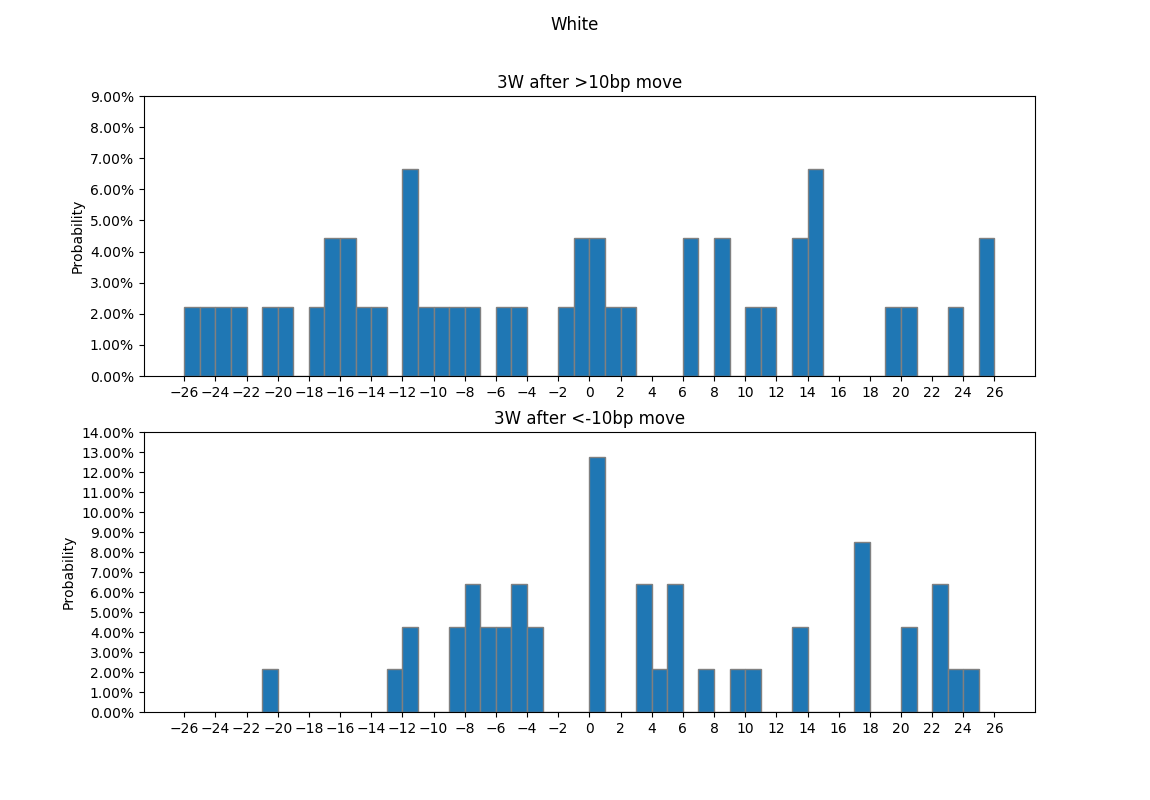

In [31]:
fig2, (ax4,ax5) = plt.subplots(2,1, figsize=(11.5,8))

ax4.hist(EDw_nextday1, bins = 52, range=[-26,26], normed = True, edgecolor='grey')
ax5.hist(EDw_nextday2, bins = 52, range=[-26,26], normed = True, edgecolor='grey')

ax4.title.set_text('3W after >10bp move')
ax5.title.set_text('3W after <-10bp move')

ax4.set_xticks(np.arange(-26,27,2))
ax5.set_xticks(np.arange(-26,27,2))

ax4.set_ylabel('Probability')
ax5.set_ylabel('Probability')

ax4.set_yticks(np.arange(0,0.10,0.01))
ax5.set_yticks(np.arange(0,0.15,0.01))

y_vals4 = ax4.get_yticks()
ax4.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals4])
y_vals5 = ax5.get_yticks()
ax5.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals5])

fig2.suptitle('White')

In [23]:
EDr_filtered1 = EDr[0] >= 10 
EDr_filtered1 = np.where(EDr_filtered1)[0] + 15
EDr_nextday1 = EDred.loc[EDr_filtered1]

In [24]:
EDr_filtered2 = EDr[0] < -10 
EDr_filtered2 = np.where(EDr_filtered2)[0] + 15
EDr_nextday2 = EDred.loc[EDr_filtered2]

<IPython.core.display.Javascript object>


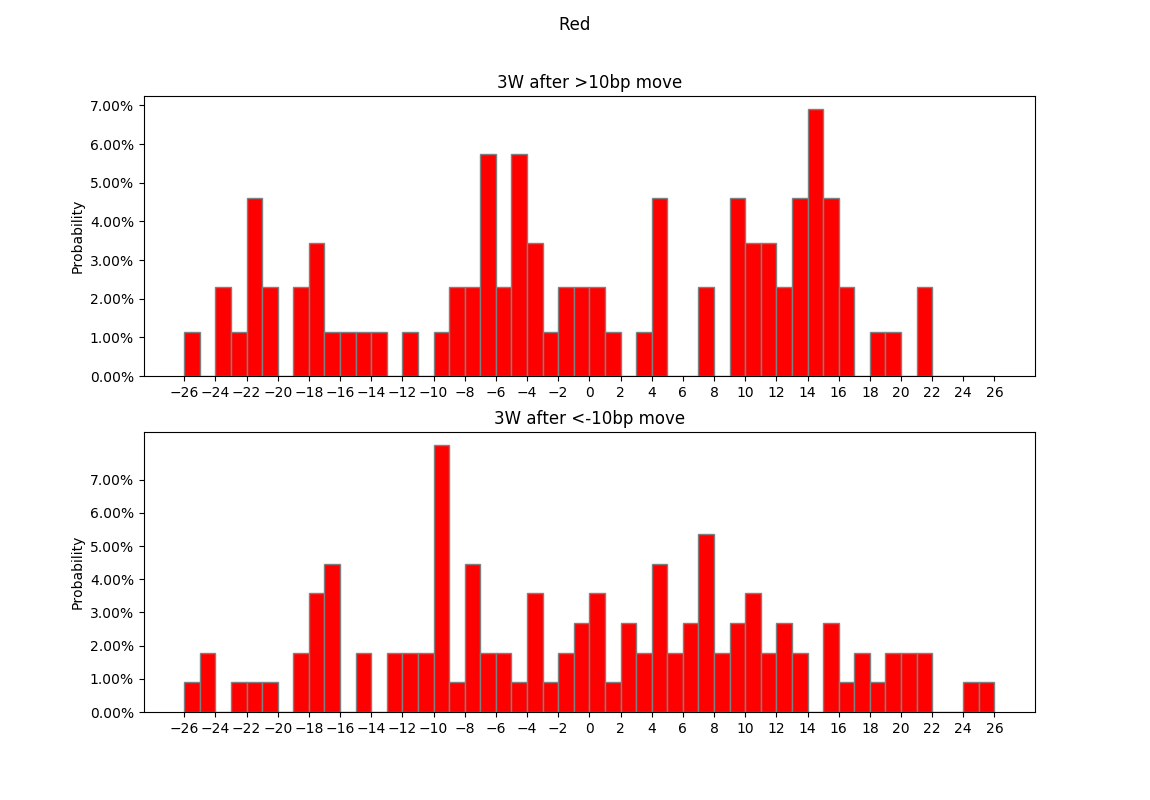

In [25]:
fig3, (ax6,ax7) = plt.subplots(2,1, figsize=(11.5,8))

ax6.hist(EDr_nextday1, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'red')
ax7.hist(EDr_nextday2, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'red')

ax6.title.set_text('3W after >10bp move')
ax7.title.set_text('3W after <-10bp move')

ax6.set_xticks(np.arange(-26,27,2))
ax7.set_xticks(np.arange(-26,27,2))

ax6.set_ylabel('Probability')
ax7.set_ylabel('Probability')

ax6.set_yticks(np.arange(0,0.08,0.01))
ax7.set_yticks(np.arange(0,0.08,0.01))

y_vals6 = ax6.get_yticks()
ax6.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals6])
y_vals7 = ax7.get_yticks()
ax7.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals7])

fig3.suptitle('Red')

In [26]:
EDg_filtered1 = EDg[0] >= 10 
EDg_filtered1 = np.where(EDg_filtered1)[0] + 15
EDg_nextday1 = EDgreen.loc[EDg_filtered1]

In [27]:
EDg_filtered2 = EDg[0] < -10 
EDg_filtered2 = np.where(EDg_filtered2)[0] + 15
EDg_nextday2 = EDgreen.loc[EDg_filtered2]

<IPython.core.display.Javascript object>


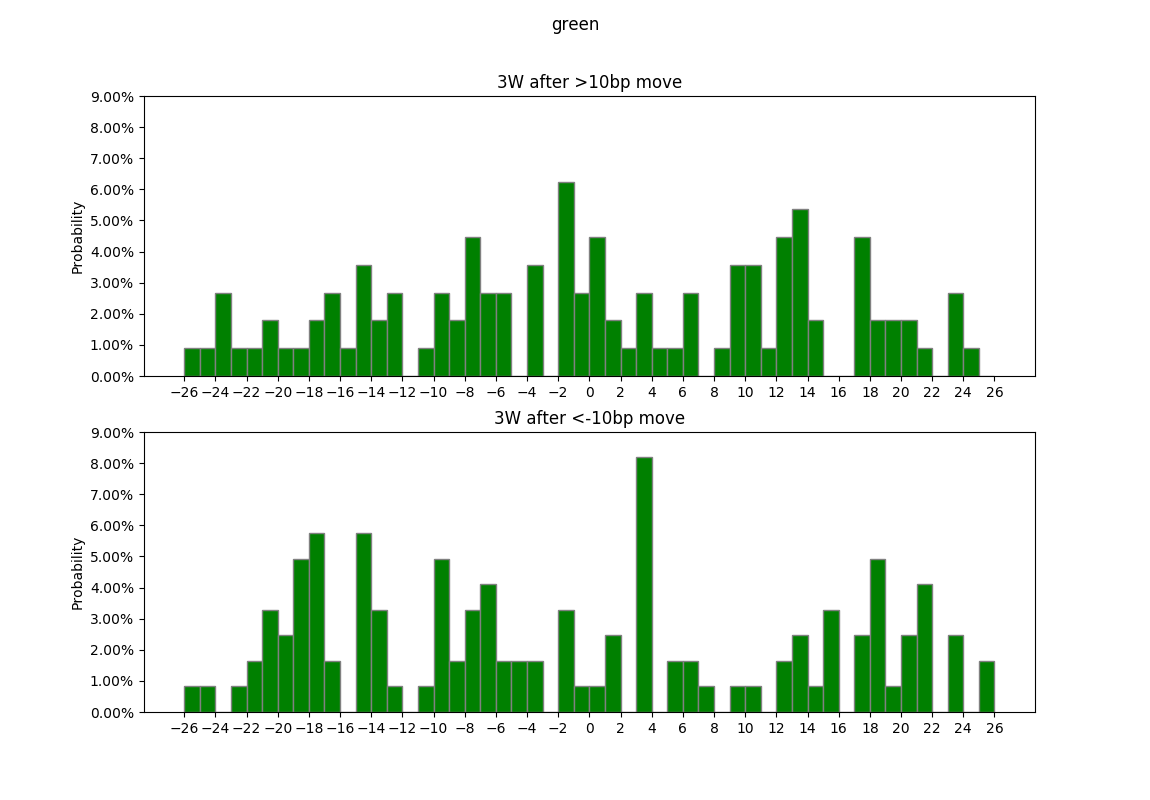

In [28]:
fig4, (ax8,ax9) = plt.subplots(2,1, figsize=(11.5,8))

ax8.hist(EDg_nextday1, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'green')
ax9.hist(EDg_nextday2, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'green')

ax8.title.set_text('3W after >10bp move')
ax9.title.set_text('3W after <-10bp move')

ax8.set_xticks(np.arange(-26,27,2))
ax9.set_xticks(np.arange(-26,27,2))

ax8.set_ylabel('Probability')
ax9.set_ylabel('Probability')

ax8.set_yticks(np.arange(0,0.10,0.01))
ax9.set_yticks(np.arange(0,0.10,0.01))

y_vals8 = ax8.get_yticks()
ax8.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals8])
y_vals9 = ax9.get_yticks()
ax9.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals9])

fig4.suptitle('green')

In [29]:
def count(list1,l,r):
    return len(list(x for x in list1 if l < x <= r))

In [68]:
count(EDw_nextday2[0], 10, 10000 )/len(EDw_nextday2)

0.2978723404255319

In [40]:
sum(EDg_nextday1[0])/len(EDg_nextday1)

-2.3712121212122037